# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler , OneHotEncoder , MinMaxScaler , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier , KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error ,accuracy_score , mean_absolute_error , mean_squared_error , r2_score
import warnings
warnings.filterwarnings("ignore")


In [2]:
data = pd.read_csv('zomato.csv' , encoding='latin1')

In [3]:
data[:2]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


# EDA

In [4]:
data.shape

(9551, 21)

In [5]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
#data.groupby(['Longitude', 'Latitude'])['City'].value_counts(normalize=True).sort_values(ascending=False).sort_index(level='City', ascending=False)

In [8]:
sum=0
for i in data['Longitude'].values:
    if i == 0.0:
        sum+=1
print(sum)

498


In [9]:
sum=0
for i in data['Latitude'].values:
    if i == 0.0:
        sum+=1
print(sum)

498


In [10]:
#imp = SimpleImputer(missing_values=0.0 , strategy='median')

In [11]:
#data['Longitude'] = imp.fit_transform(data[['Longitude']])
#data['Latitude'] = imp.fit_transform(data[['Latitude']])

In [12]:
long_median = data[data['Longitude'] != 0.0 ]['Longitude'].median()   #mean()
long_median

77.2012178

In [13]:
lat_median = data[data['Longitude'] != 0.0 ]['Latitude'].median()
lat_median

28.57457078

In [14]:
data['Longitude'] = data['Longitude'].replace( 0.0 , long_median )

In [15]:
data['Latitude'] = data['Latitude'].replace( 0.0 , lat_median )

In [16]:
sum=0
for i in data['Longitude'].values:
    if i == 0.0:
        sum+=1
print(sum)

0


In [17]:
sum=0
for i in data['Latitude'].values:
    if i == 0.0:
        sum+=1
print(sum)

0


In [18]:
sum=0
for i in data['Longitude'].values:
    if i == long_median:
        sum+=1
print(sum)

500


In [19]:
sum=0
for i in data['Latitude'].values:
    if i == lat_median:
        sum+=1
print(sum)

499


In [20]:
data.isna().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


<Axes: >

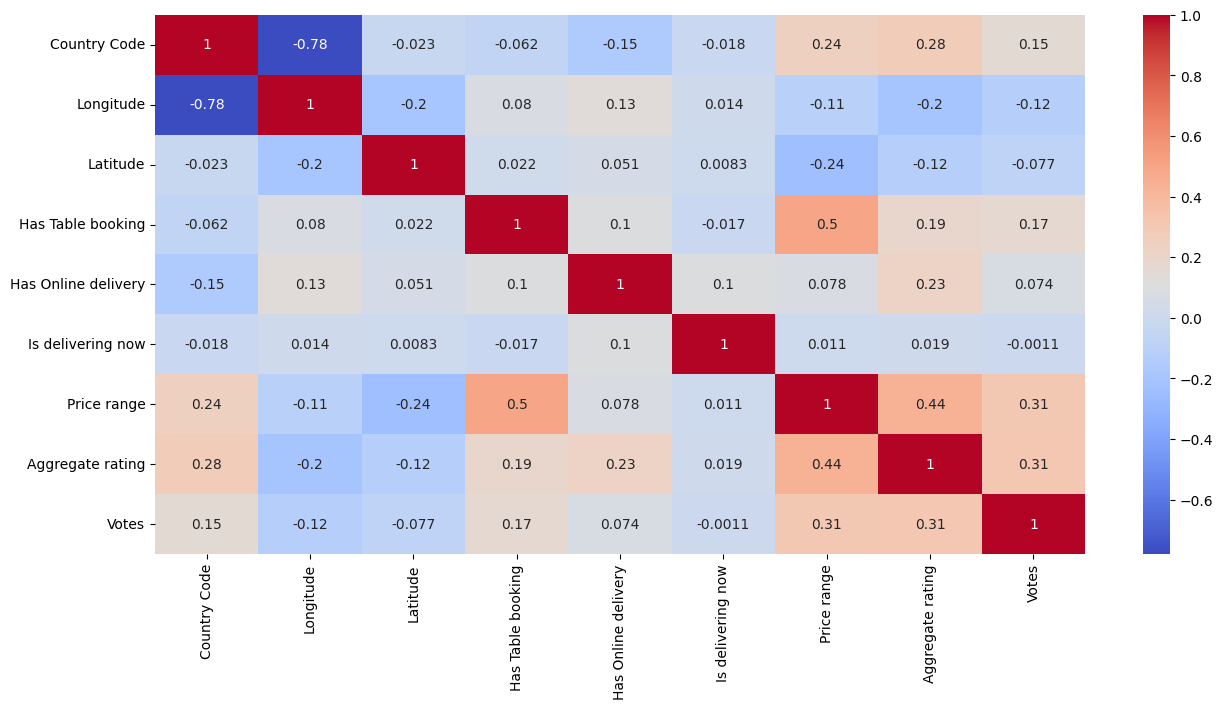

In [70]:
plt.figure(figsize=(15,7))
sns.heatmap(data.select_dtypes(exclude=object).corr() , annot=True , cmap='coolwarm')

In [22]:
y = data['Average Cost for two']

In [23]:
# Drop Unwanted Columns  ( without Longitude & Lattitude)

data = data.drop(columns=['Restaurant ID' , 'Restaurant Name' ,
                          'Address','Currency' ,'Locality' ,
                          'Locality Verbose' ,'Average Cost for two',
                          'Switch to order menu'])

In [24]:
data.shape

(9551, 13)

In [25]:
y [:2]

,Average Cost for two
0,1100
1,1200


In [26]:
for i in data.columns:
    print(f'{i}  unique values : {data[i].nunique()}')
    print('=======================')

Country Code  unique values : 15
City  unique values : 141
Longitude  unique values : 8119
Latitude  unique values : 8676
Cuisines  unique values : 1825
Has Table booking  unique values : 2
Has Online delivery  unique values : 2
Is delivering now  unique values : 2
Price range  unique values : 4
Aggregate rating  unique values : 33
Rating color  unique values : 6
Rating text  unique values : 6
Votes  unique values : 1012


# Preprocessing

In [27]:
data['Cuisines'].fillna(data['Cuisines'].mode()[0] , inplace=True)

In [28]:
change_cuis = data['Cuisines']

In [29]:
change_cuis

,Cuisines
0,"French, Japanese, Desserts"
1,Japanese
2,"Seafood, Asian, Filipino, Indian"
3,"Japanese, Sushi"
4,"Japanese, Korean"
...,...
9546,Turkish
9547,"World Cuisine, Patisserie, Cafe"
9548,"Italian, World Cuisine"
9549,Restaurant Cafe


In [30]:
var = []
result = change_cuis.str.contains( pat='Indian|North Indian' , case=False )
for i in result:
    if i:
        var.append('I')
    else:
        var.append('A')
print(var)

['A', 'A', 'I', 'A', 'A', 'A', 'A', 'A', 'I', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'I', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'I', 'A', 'A', 'I', 'A', 'A', 'A', 'A', 'A', 'A', 'I', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'I', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'I', 'A', 'A', 'A', 'I', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',

In [31]:
change_var = pd.DataFrame(data=var , columns=['cuisiss'])

In [32]:
cuisions = pd.DataFrame(data=change_cuis.values , columns=['cuisi'])

In [33]:
cuisions[:2]

,cuisi
0,"French, Japanese, Desserts"
1,Japanese


In [34]:
cuisis = pd.concat([cuisions , change_var] , axis=1)

In [35]:
cuisis[:3]

,cuisi,cuisiss
0,"French, Japanese, Desserts",A
1,Japanese,A
2,"Seafood, Asian, Filipino, Indian",I


In [36]:
data['Cuisines'] = cuisis['cuisiss']

In [37]:
data[:4]

,Country Code,City,Longitude,Latitude,Cuisines,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,162,Makati City,121.027535,14.565443,A,Yes,No,No,3,4.8,Dark Green,Excellent,314
1,162,Makati City,121.014101,14.553708,A,Yes,No,No,3,4.5,Dark Green,Excellent,591
2,162,Mandaluyong City,121.056831,14.581404,I,Yes,No,No,4,4.4,Green,Very Good,270
3,162,Mandaluyong City,121.056475,14.585318,A,No,No,No,4,4.9,Dark Green,Excellent,365


In [38]:
data['Cuisines'].value_counts(dropna=False)

,count
Cuisines,
A,5283
I,4268


In [39]:
data['Has Table booking'].replace({'Yes':1 , 'No':0} , inplace=True)

In [40]:
data['Has Online delivery'].replace({'Yes':1 , 'No':0} , inplace=True)

In [41]:
data['Is delivering now'].replace({'Yes':1 , 'No':0} , inplace=True)

In [42]:
data[:2]

,Country Code,City,Longitude,Latitude,Cuisines,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,162,Makati City,121.027535,14.565443,A,1,0,0,3,4.8,Dark Green,Excellent,314
1,162,Makati City,121.014101,14.553708,A,1,0,0,3,4.5,Dark Green,Excellent,591


In [43]:
data['Price range'].value_counts()

,count
Price range,
1,4444
2,3113
3,1408
4,586


In [44]:
data.dtypes

,0
Country Code,int64
City,object
Longitude,float64
Latitude,float64
Cuisines,object
Has Table booking,int64
Has Online delivery,int64
Is delivering now,int64
Price range,int64
Aggregate rating,float64


In [45]:
X = data

In [46]:
X[:2]

,Country Code,City,Longitude,Latitude,Cuisines,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,162,Makati City,121.027535,14.565443,A,1,0,0,3,4.8,Dark Green,Excellent,314
1,162,Makati City,121.014101,14.553708,A,1,0,0,3,4.5,Dark Green,Excellent,591


In [47]:
#data['City'].nunique()

# Visualization

<Axes: xlabel='count', ylabel='Rating color'>

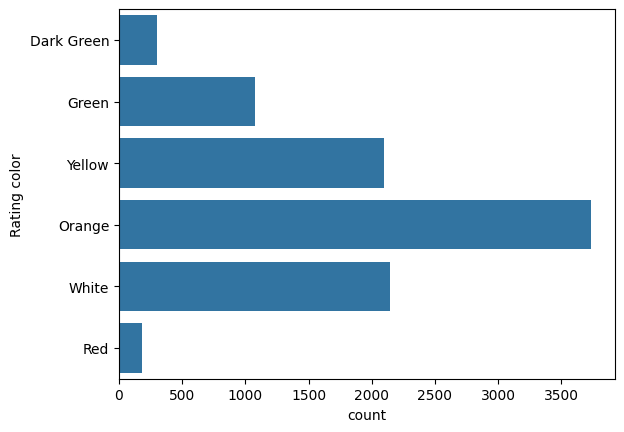

In [48]:
sns.countplot(data['Rating color'])

Text(0.5, 1.0, 'Table Booking Distribution')

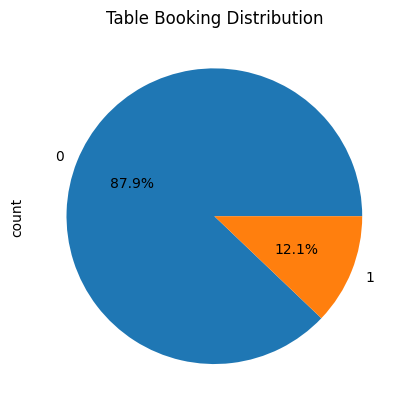

In [49]:
data['Has Table booking'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Table Booking Distribution')

Text(0.5, 1.0, 'Online delivary Distribution')

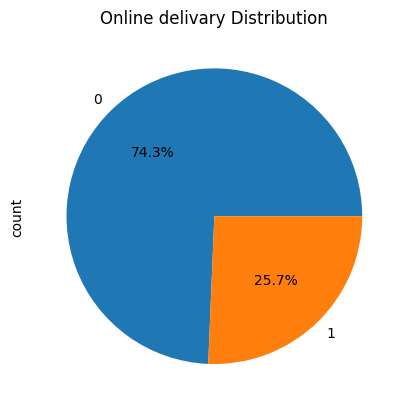

In [50]:
data['Has Online delivery'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Online delivary Distribution')

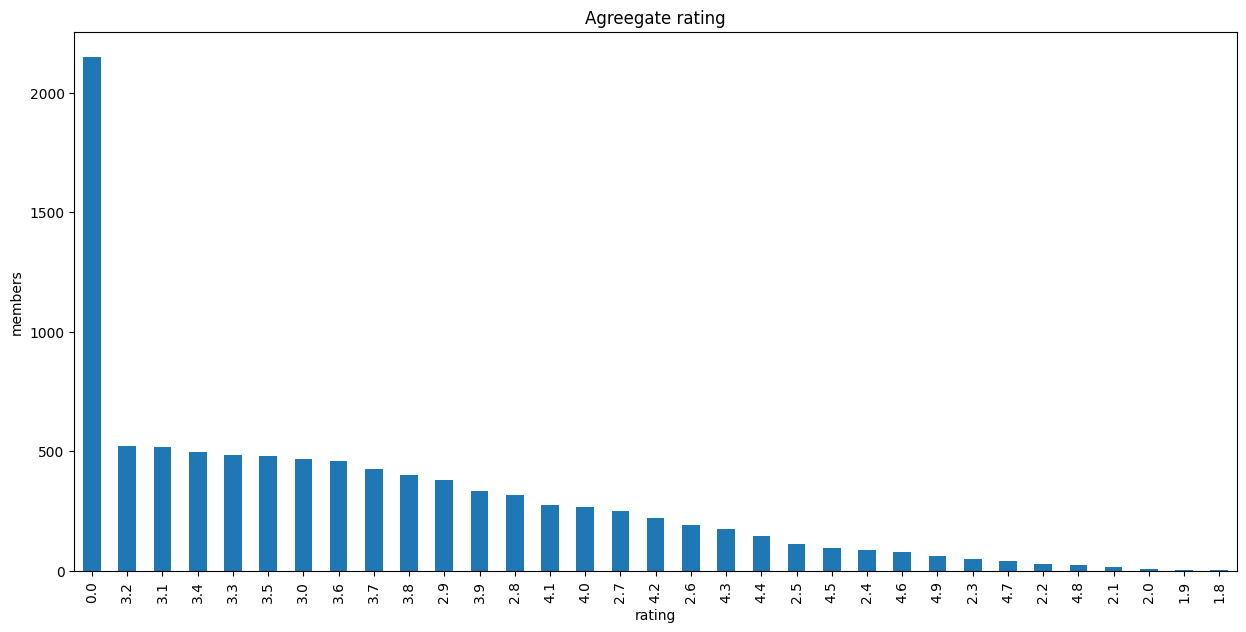

In [51]:
plt.figure(figsize=(15,7))
data['Aggregate rating'].value_counts().plot(kind='bar' )
plt.title('Agreegate rating')
plt.xlabel('rating')
plt.ylabel('members')
plt.show()

## Feature Scaling

In [52]:
y = pd.DataFrame(data = y )

In [53]:
scal = StandardScaler()
Y = scal.fit_transform(y)

In [54]:
Y[:2]

array([[-6.15438439e-03],
       [ 4.89590650e-05]])

In [55]:
X_train , X_test , y_train , y_test = train_test_split( X,Y , test_size=0.2 , random_state=3)

In [56]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((7640, 13), (1911, 13), (7640, 1), (1911, 1))

In [57]:
7640+1911

9551

In [58]:
y_test

array([[-0.0371711 ],
       [ 0.05587905],
       [-0.05578113],
       ...,
       [-0.04957779],
       [-0.07377083],
       [-0.04957779]])

## Pipeline

In [59]:
num_features = data.select_dtypes(exclude=object).columns
num_features

Index(['Country Code', 'Longitude', 'Latitude', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Price range',
       'Aggregate rating', 'Votes'],
      dtype='object')

In [60]:
cat_features = data.select_dtypes(include=object).columns
cat_features

Index(['City', 'Cuisines', 'Rating color', 'Rating text'], dtype='object')

In [61]:
cat_transform = Pipeline(steps=[('imputer' , SimpleImputer(strategy='most_frequent')),
                                ('encoding' , OneHotEncoder(handle_unknown='ignore')) ])

In [62]:
num_transform = Pipeline(steps=[('imputer' , SimpleImputer(strategy='median')),
                               ('scaling' , StandardScaler()) ])

In [63]:
preprocessor = ColumnTransformer(transformers=[
    ('categorical_trans' , cat_transform , cat_features),
    ('numerical_tarns' , num_transform , num_features) ])

## Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression
model_lr = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('Regressor', LinearRegression())
])

In [72]:
model_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical_trans',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['City', 'Cuisines', 'Rating color', 'Rating text'], dtype='object')),
                                                 ('numerical_tarns',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  Index(['Country Code', 'Longitude', 'Latitude', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Price range',
       'Aggregate rating', 'Votes'],
      dtype='object'))])),
                ('Regressor', LinearRegression())])

In [78]:
def result (model,alg,X_train , X_test , y_train , y_test):
  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test)
  print(alg)
  print("Train")
  print(f'MAPE : {mean_absolute_percentage_error(y_train , train_pred)}')
  print(f'MAE : {mean_absolute_error(y_train , train_pred)}')
  print(f'MSE : {mean_squared_error(y_train , train_pred)}')
  print('=======================================')
  print('Test')
  print(f'MAPE : {mean_absolute_percentage_error(y_test , test_pred)}')
  print(f'MAE : {mean_absolute_error(y_test , test_pred)}')
  print(f'MSE : {mean_squared_error(y_test , test_pred)}')

In [79]:
result(model_lr,'LR',X_train , X_test , y_train , y_test)

LR
Train
MAPE : 11.719354130677822
MAE : 0.04763430999464066
MSE : 0.3674252840494395
Test
MAPE : 106.49635946952134
MAE : 0.07383063806764495
MSE : 0.37955184097058337


## KNN

In [64]:
model = Pipeline(steps=[
    ('preprocessing' , preprocessor),
    ('knregressor' , KNeighborsRegressor(n_neighbors=3)) ])  # , metric='euclidean' , weights='distance'

In [65]:
model.fit(X_train , y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical_trans',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['City', 'Cuisines', 'Rating color', 'Rating text'], dtype='object')),
                                                 ('numerical_tarns',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  Index(['Country Code', 'Longitude', 'Latitude', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Price range',
       'Aggregate rating', 'Votes'],
      dtype='object'))])),
                ('knregressor', KNeighborsRegressor(n_neighbors=3))])

In [66]:
test_pred = model.predict(X_test)

In [67]:
train_pred = model.predict(X_train)

In [68]:
# TEST DATA

print(f'MAPE : {mean_absolute_percentage_error(y_test , test_pred)}')
print(f'MAE : {mean_absolute_error(y_test , test_pred)}')
print(f'MSE : {mean_squared_error(y_test , test_pred)}')

MAPE : 3.5559032831022455
MAE : 0.020144581497174407
MSE : 0.1730660228588396


In [69]:
# TRAIN DATA

print(f'MAPE : {mean_absolute_percentage_error(y_train , train_pred)}')
print(f'MAE : {mean_absolute_error(y_train , train_pred)}')
print(f'MSE : {mean_squared_error(y_train , train_pred)}')

MAPE : 3.042527854431696
MAE : 0.021969240978151755
MSE : 0.2096477411861703


## Decision Tree

In [84]:
from sklearn.tree import DecisionTreeRegressor
model_dt = Pipeline(steps=[
    ('preprocessing' , preprocessor),
    ('Regressor' , DecisionTreeRegressor(max_depth=6,min_samples_split=6,min_samples_leaf=2,random_state=0))
])

In [85]:
model_dt.fit(X_train , y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical_trans',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['City', 'Cuisines', 'Rating color', 'Rating text'], dtype='object')),
                                                 ('numerical_tarns',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  Index(['Country Code', 'Longitude', 'Latitude', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Price range',
       'Aggregate rating', 'Votes'],
      dtype='object'))])),
                ('Regressor',
                 DecisionTreeRegressor(max_depth=6, min_samples_leaf=2,
                                       min_samples_split=6, random_state=0))])

In [86]:
result(model_dt,'DT',X_train , X_test , y_train , y_test)

DT
Train
MAPE : 1.9192637549792633
MAE : 0.02078959481352227
MSE : 0.09879006660940973
Test
MAPE : 2.060672051534981
MAE : 0.02999813254869338
MSE : 0.7273622724990885


## Random Forest

In [88]:
from sklearn.ensemble import RandomForestRegressor
model_rf = Pipeline(steps=[
    ('preprocessing' , preprocessor),
    ('Regressor' , RandomForestRegressor(max_depth=6,min_samples_split=6,min_samples_leaf=2,random_state=0))
])

In [89]:
model_rf.fit(X_train , y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical_trans',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['City', 'Cuisines', 'Rating color', 'Rating text'], dtype='object')),
                                                 ('numerical_tarns',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  Index(['Country Code', 'Longitude', 'Latitude', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Price range',
       'Aggregate rating', 'Votes'],
      dtype='object'))])),
                ('Regressor',
                 RandomForestRegressor(max_depth=6, min_samples_leaf=2,
                                       min_samples_split=6, random_state=0))])

In [90]:
result(model_rf,'RF',X_train , X_test , y_train , y_test)

RF
Train
MAPE : 4.229589402513602
MAE : 0.027917356406158774
MSE : 0.22928847848320302
Test
MAPE : 2.142558363451237
MAE : 0.02276738355191418
MSE : 0.1772835387107212
